In [31]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt

# Import the requests library.
import requests

# Import the NumPy module.
import numpy as np

from citipy import citipy

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [32]:
# Starting URL for Weather Map API Call.
BASE_URL = "https://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key

In [33]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [34]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

52.88448181427029 -30.24030910837024
29.52542017179971 131.10194709328528
65.33759294473586 103.11545796797827
-15.08042654540732 40.84701063804286
-45.29713479226845 -8.343757132076405
88.58042972374332 94.74006007329507
53.45585939118993 71.72560683885715
46.798639472800375 101.3123077844412
-65.77607533298237 -137.90177698360787
84.65939445702836 39.41024109764808
59.455132147554025 -14.176146393672326
-0.8594801736242772 139.45409188481722
17.990743582997553 -136.44224128229635
11.859597359725441 78.876713028903
4.510198422504217 -91.95762734267863
67.26134530946283 -162.8685386950005
-29.162392144790076 -14.905054963279241
82.80687608180503 144.97580129641682
-14.773148662652801 70.86602790170298
-89.4573555383097 135.72644692409534
82.3630811898231 63.718314320295605
-76.13992418089515 -113.2263242135975
36.32894906260117 8.811124860327055
48.660523204863864 -101.72616572363769
2.4932225936448447 59.178778580653784
-25.94259511193424 100.95641223729046
-24.038673766113092 -140.94

In [35]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [37]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = BASE_URL + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | kavieng
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | soyo
Processing Record 5 of Set 1 | bangkalan
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | mahon
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | ketchikan
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | saint george
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | sompeta
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bacolod
Processing Record 21 of Set 1 | karaul
City not found. Skipping...
Processing Record 22 of S

Processing Record 38 of Set 4 | sehithwa
Processing Record 39 of Set 4 | new norfolk
Processing Record 40 of Set 4 | bantogon
Processing Record 41 of Set 4 | itaituba
Processing Record 42 of Set 4 | turayf
Processing Record 43 of Set 4 | chaman
Processing Record 44 of Set 4 | mount gambier
Processing Record 45 of Set 4 | xining
Processing Record 46 of Set 4 | cabo san lucas
Processing Record 47 of Set 4 | sinegorye
Processing Record 48 of Set 4 | dalbandin
Processing Record 49 of Set 4 | neuquen
Processing Record 50 of Set 4 | longyan
Processing Record 1 of Set 5 | sitka
Processing Record 2 of Set 5 | severo-kurilsk
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | sola
Processing Record 5 of Set 5 | iqaluit
Processing Record 6 of Set 5 | port hawkesbury
Processing Record 7 of Set 5 | beringovskiy
Processing Record 8 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 9 of Set 5 | saleaula
City not found. Skipping...
Processing Record 10 of Set 5 

Processing Record 26 of Set 8 | falealupo
City not found. Skipping...
Processing Record 27 of Set 8 | dolores
Processing Record 28 of Set 8 | anadyr
Processing Record 29 of Set 8 | inyonga
Processing Record 30 of Set 8 | sabya
Processing Record 31 of Set 8 | opuwo
Processing Record 32 of Set 8 | sao filipe
Processing Record 33 of Set 8 | consett
Processing Record 34 of Set 8 | pilar
Processing Record 35 of Set 8 | totness
Processing Record 36 of Set 8 | peniche
Processing Record 37 of Set 8 | zurrieq
Processing Record 38 of Set 8 | ilovlya
Processing Record 39 of Set 8 | challans
Processing Record 40 of Set 8 | keflavik
Processing Record 41 of Set 8 | paradwip
City not found. Skipping...
Processing Record 42 of Set 8 | shiogama
Processing Record 43 of Set 8 | bakchar
Processing Record 44 of Set 8 | harper
Processing Record 45 of Set 8 | zhangye
Processing Record 46 of Set 8 | labuhan
Processing Record 47 of Set 8 | muravlenko
Processing Record 48 of Set 8 | talaya
Processing Record 49 

Processing Record 16 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 17 of Set 12 | lorengau
Processing Record 18 of Set 12 | havre-saint-pierre
Processing Record 19 of Set 12 | konstantinovka
Processing Record 20 of Set 12 | dickinson
Processing Record 21 of Set 12 | monywa
Processing Record 22 of Set 12 | mporokoso
Processing Record 23 of Set 12 | alto longa
Processing Record 24 of Set 12 | okha
Processing Record 25 of Set 12 | coolum beach
Processing Record 26 of Set 12 | guelph
Processing Record 27 of Set 12 | biak
Processing Record 28 of Set 12 | balabac
Processing Record 29 of Set 12 | portland
Processing Record 30 of Set 12 | kayalpattinam
Processing Record 31 of Set 12 | bocas del toro
Processing Record 32 of Set 12 | torbay
Processing Record 33 of Set 12 | campos gerais
Processing Record 34 of Set 12 | poya
Processing Record 35 of Set 12 | yaypan
Processing Record 36 of Set 12 | veraval
Processing Record 37 of Set 12 | coihaique
Processing Record 38 of Set

In [39]:
len(city_data)n

561

In [40]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,298.19,71,63,1.49,PF,2022-12-30 19:43:55
1,Kavieng,-2.5744,150.7967,300.30,73,100,0.71,PG,2022-12-30 19:43:55
2,Nikolskoye,59.7035,30.7861,276.09,99,100,2.48,RU,2022-12-30 19:43:55
3,Soyo,-6.1349,12.3689,299.26,86,100,2.19,AO,2022-12-30 19:43:56
4,Bangkalan,-7.0455,112.7351,298.12,92,100,3.93,ID,2022-12-30 19:43:56
5,Barrow,71.2906,-156.7887,255.16,78,100,4.12,US,2022-12-30 19:43:00
6,Port Alfred,-33.5906,26.8910,292.69,74,95,0.45,ZA,2022-12-30 19:43:57
7,Mahon,39.8885,4.2658,288.46,88,20,2.57,ES,2022-12-30 19:43:57
8,Longyearbyen,78.2186,15.6401,268.06,74,40,8.23,SJ,2022-12-30 19:43:57
9,Qaanaaq,77.4840,-69.3632,242.43,67,21,3.44,GL,2022-12-30 19:43:58


In [41]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-12-30 19:43:55,-23.1203,-134.9692,298.19,71,63,1.49
1,Kavieng,PG,2022-12-30 19:43:55,-2.5744,150.7967,300.30,73,100,0.71
2,Nikolskoye,RU,2022-12-30 19:43:55,59.7035,30.7861,276.09,99,100,2.48
3,Soyo,AO,2022-12-30 19:43:56,-6.1349,12.3689,299.26,86,100,2.19
4,Bangkalan,ID,2022-12-30 19:43:56,-7.0455,112.7351,298.12,92,100,3.93
5,Barrow,US,2022-12-30 19:43:00,71.2906,-156.7887,255.16,78,100,4.12
6,Port Alfred,ZA,2022-12-30 19:43:57,-33.5906,26.8910,292.69,74,95,0.45
7,Mahon,ES,2022-12-30 19:43:57,39.8885,4.2658,288.46,88,20,2.57
8,Longyearbyen,SJ,2022-12-30 19:43:57,78.2186,15.6401,268.06,74,40,8.23
9,Qaanaaq,GL,2022-12-30 19:43:58,77.4840,-69.3632,242.43,67,21,3.44


In [42]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [43]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

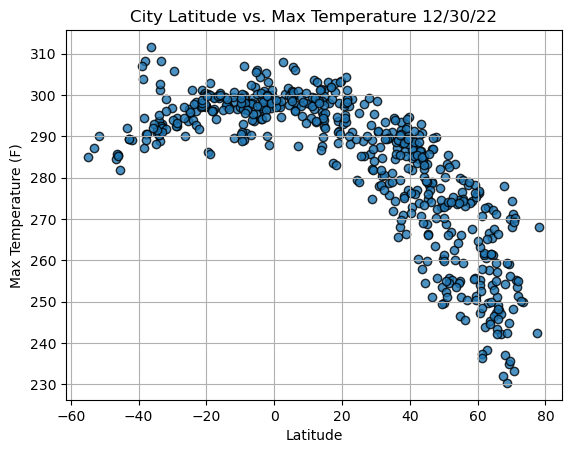

In [44]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

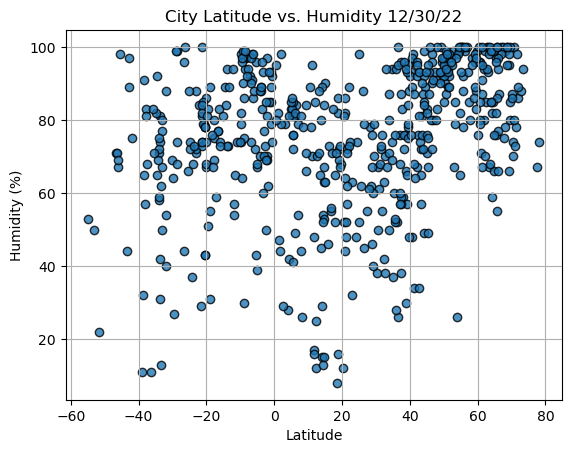

In [51]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

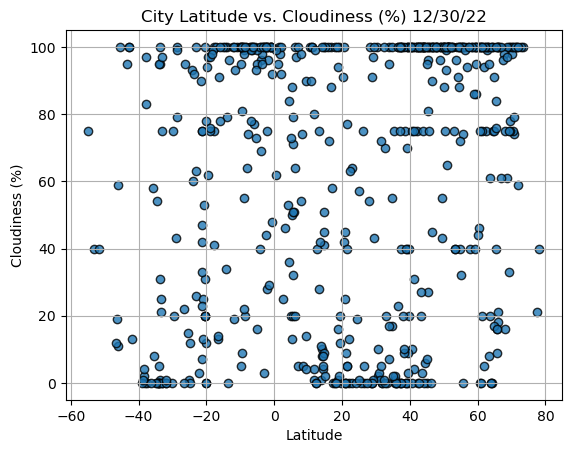

In [50]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

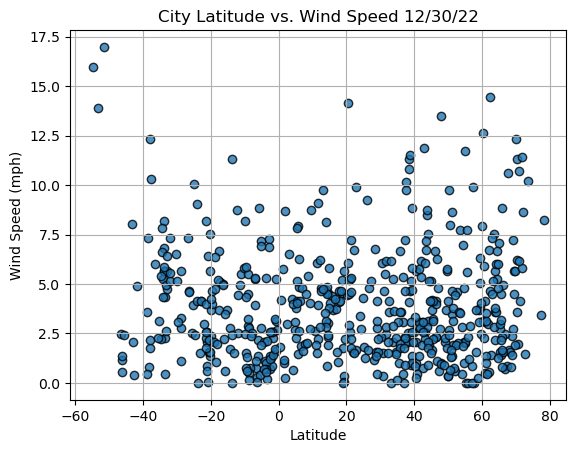

In [52]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()